In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from numpy import set_printoptions
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import sys
from io import StringIO
from sklearn.linear_model import SGDClassifier, SGDRegressor
import seaborn as sns


# Εισαγωγή δεδομένων με χρήση των βιβλιοθηκών Pandas

In [54]:
#data retrieving
data = pd.read_csv('C:/Users/athanasis/Desktop/AI-Master/..A..Semester/Machine Learning/Tasks/exer1/day.csv',sep=",")
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Προετοιμασία δεδομένων και χρήση minMax Scaler για να κάνω ένα normalize τα δεδομένα μέσα στο διάστημα [0,1]

In [55]:
#data preparation & normalization
ndata1 = data[['temp','windspeed','hum']]
date = data['dteday']
y = data["cnt"]
print(ndata1.head(11))
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(ndata1)


        temp  windspeed       hum
0   0.344167   0.160446  0.805833
1   0.363478   0.248539  0.696087
2   0.196364   0.248309  0.437273
3   0.200000   0.160296  0.590435
4   0.226957   0.186900  0.436957
5   0.204348   0.089565  0.518261
6   0.196522   0.168726  0.498696
7   0.165000   0.266804  0.535833
8   0.138333   0.361950  0.434167
9   0.150833   0.223267  0.482917
10  0.169091   0.122132  0.686364


# Ημερήσιο γράφημα σε χρήσης ποδηλάτων και θερμοκρασίας.

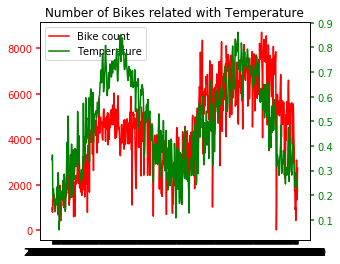

In [56]:
fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
par1 = host.twinx()
p1, = host.plot(date, y, color='r',label = "Bike count")
p2, = par1.plot(date, ndata1['temp'], "g", label="Temperature")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
lines = [p1, p2]
host.legend(lines, [l.get_label() for l in lines])
plt.title('Number of Bikes related with Temperature')
plt.show()

# Split δεδομένων σε train και test. Αρχικοποίηση του Linear Regression 
Χρήση του R^2 (coefficient of determination) regression score function για να πάρουμε μια σχετική εικώνα για την απόδοση του Regression.

In [57]:
#split data
X_train, X_test, y_train, y_test = train_test_split(ndata1, y, test_size=0.30)

#initialize the linear regression model
Regressor = linear_model.LinearRegression()
Regressor.fit(X_train, y_train)
prediction = Regressor.predict(X_test)
print("Linear Regression with all Features------->Accuracy:",r2_score(y_test, prediction))
print(type(prediction))

Linear Regression with all Features------->Accuracy: 0.39758151284718113
<class 'numpy.ndarray'>


In [58]:
# X_train, X_test, y_train, y_test = train_test_split(ndata1, y, test_size=0.30)


# n = 1 # number of instances to keep
# fX = ndata[:n].values
# fy = y[:n].values


# Χρήση του Stochastic Gradient Descent με 3 διαφορετικά learning rate.
Το loss έμεινε squared_loss(least squares) το οποίο είναι το default του μοντέλου. Με το random_state=3 κάνουμε ένα σχετικό suffle στα δεδομένα, το default είναι το 'None'.

Εκτύπωση των loss ανα εποχή(15) για τα 3 διαφορετικά learning rate.
Με βάση τα 3 plot το πιο ικανοποιητικο learning rate φαινεται να ειναι αυτο του 0.1. Φαινεται οτι το μοντέλο δεν κανει Overfit σε σχεση με το learning rate = 1.

-- Epoch 1
Norm: 2941.54, NNZs: 3, Bias: 2429.469242, T: 511, Avg. loss: 1744233.090999
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3606.52, NNZs: 3, Bias: 2382.280705, T: 511, Avg. loss: 1420827.723214
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4146.95, NNZs: 3, Bias: 2361.769357, T: 511, Avg. loss: 1320120.511381
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4591.87, NNZs: 3, Bias: 2357.847227, T: 511, Avg. loss: 1254699.859701
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4963.76, NNZs: 3, Bias: 2364.982429, T: 511, Avg. loss: 1208994.479926
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5278.71, NNZs: 3, Bias: 2379.793216, T: 511, Avg. loss: 1175614.857705
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5548.44, NNZs: 3, Bias: 2400.050398, T: 511, Avg. loss: 1150442.225074
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5781.65, NNZs: 3, Bias: 2424.208773, T: 511, Avg. loss: 1130969.111882
Total training time: 0.00 seconds.
-- Epoch 1
Norm:

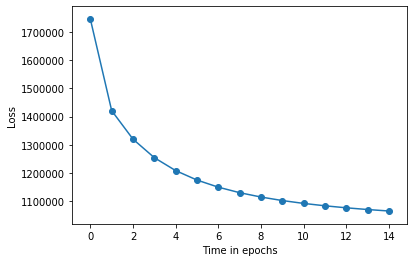

-- Epoch 1
Norm: 3341.04, NNZs: 3, Bias: 2322.020712, T: 511, Avg. loss: 1655931.275851
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4241.89, NNZs: 3, Bias: 2292.833515, T: 511, Avg. loss: 1340454.593527
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 4901.19, NNZs: 3, Bias: 2301.404488, T: 511, Avg. loss: 1238219.490505
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5402.63, NNZs: 3, Bias: 2330.453360, T: 511, Avg. loss: 1179396.574834
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5795.32, NNZs: 3, Bias: 2371.216979, T: 511, Avg. loss: 1142106.645955
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 6109.88, NNZs: 3, Bias: 2418.719205, T: 511, Avg. loss: 1116900.668419
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 6366.55, NNZs: 3, Bias: 2469.930238, T: 511, Avg. loss: 1098993.473186
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 6579.30, NNZs: 3, Bias: 2522.925411, T: 511, Avg. loss: 1085732.378976
Total training time: 0.00 seconds.
-- Epoch 1
Norm:

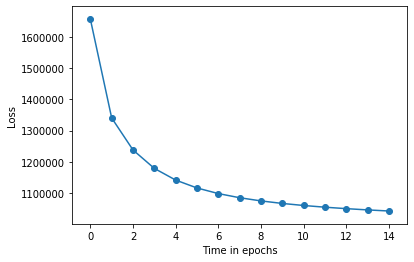

-- Epoch 1
Norm: 8045.71, NNZs: 3, Bias: 2217.976511, T: 511, Avg. loss: 1524883.969209
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 8581.17, NNZs: 3, Bias: 2916.901266, T: 511, Avg. loss: 1214147.859599
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 8870.22, NNZs: 3, Bias: 3243.208041, T: 511, Avg. loss: 1171240.903098
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9056.63, NNZs: 3, Bias: 3430.490441, T: 511, Avg. loss: 1149799.153740
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9180.57, NNZs: 3, Bias: 3550.576823, T: 511, Avg. loss: 1136651.128864
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9264.37, NNZs: 3, Bias: 3632.792036, T: 511, Avg. loss: 1127580.029426
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9321.81, NNZs: 3, Bias: 3691.661982, T: 511, Avg. loss: 1120814.725000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9361.63, NNZs: 3, Bias: 3735.304538, T: 511, Avg. loss: 1115488.975770
Total training time: 0.00 seconds.
-- Epoch 1
Norm:

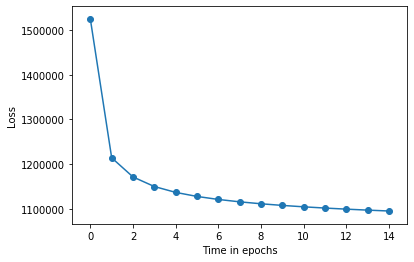

In [59]:
learning_rate = [0.07,0.1,1]
for k in range(3):
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    sgd = SGDRegressor(loss="squared_loss",  eta0=learning_rate[k], penalty=None,
                       random_state=3, verbose=1)
    epochs = 15 # number of epochs
    for epoch in range(epochs):
            model = sgd.partial_fit(X_train, y_train)
            #print(model.coef_)
            pred = model.predict(X_test)

    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    print(loss_history)
    loss_list = []
    for line in loss_history.split('\n'):
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.append(float(line.split("loss: ")[-1]))

 
    print("R Squared With Learning_rate " ,r2_score(y_test,pred) )
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.scatter(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Time in epochs")
    plt.ylabel("Loss")
    plt.show()


    

# Παρουσίαση του καλύτερου fit για καθε ενα γραμμικό feature.

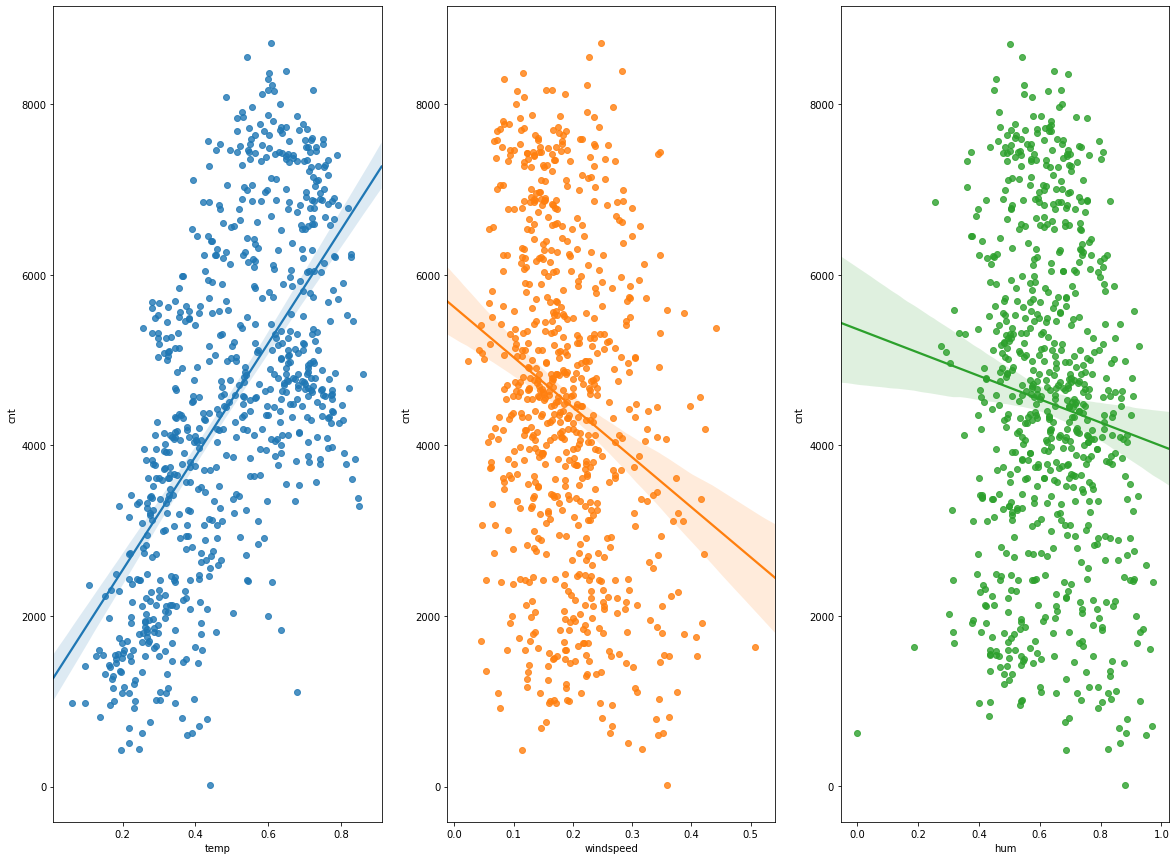

In [60]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 15)
sns.regplot(x=data["temp"], y= y,ax=ax1)
sns.regplot(x=data["windspeed"], y=y,ax=ax2)
sns.regplot(x=data["hum"], y=y,ax=ax3)

# Predict με μόνο ένα feature, και ένα instance.

To feature αυτό είναι αυτο της θερμοκρασίας.
Το learning rate είναι το 0.1 με βαση τα αποτελέσματα του παραπάνω κώδικα. Τέλος γίνεται και παρουσίαση του loss ανά εποχή, και φαίνεται πως το μειώνεται για κάθε μια εποχή που περνάει. Αρχίζει να μειώνεται ο ρυθμός που αλλάζει το loss μετά την πέμπτη περίοδο.

In [61]:
ndata1 = data[['temp']]
n = 1 ;# number of instances to keep
fX = ndata1[:n].values
fy = y[:n].values



In [62]:
learning_rate = 0.1
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=47, verbose=1)

p_sum = [] 
epochs = 15 

for epoch in range(epochs):
    model = sgd.partial_fit(fX, fy)
    y = model.predict(fX)
    p_sum.append(np.sum(fy-y))
    

-- Epoch 1
Norm: 33.90, NNZs: 1, Bias: 98.500000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 64.01, NNZs: 1, Bias: 185.983258, T: 1, Avg. loss: 382666.025011
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 90.75, NNZs: 1, Bias: 263.681944, T: 1, Avg. loss: 301854.284724
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 114.50, NNZs: 1, Bias: 332.690412, T: 1, Avg. loss: 238108.437255
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 135.60, NNZs: 1, Bias: 393.980622, T: 1, Avg. loss: 187824.492682
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 154.33, NNZs: 1, Bias: 448.415823, T: 1, Avg. loss: 148159.554772
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 170.97, NNZs: 1, Bias: 496.762714, T: 1, Avg. loss: 116871.092565
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 185.75, NNZs: 1, Bias: 539.702242, T: 1, Avg. loss: 92190.154718
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 198.87, NNZs: 1, Bias: 577.839195, T: 1, Avg

In [63]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

-- Epoch 1
Norm: 8045.71, NNZs: 3, Bias: 2217.976511, T: 511, Avg. loss: 1524883.969209
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 8581.17, NNZs: 3, Bias: 2916.901266, T: 511, Avg. loss: 1214147.859599
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 8870.22, NNZs: 3, Bias: 3243.208041, T: 511, Avg. loss: 1171240.903098
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9056.63, NNZs: 3, Bias: 3430.490441, T: 511, Avg. loss: 1149799.153740
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9180.57, NNZs: 3, Bias: 3550.576823, T: 511, Avg. loss: 1136651.128864
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9264.37, NNZs: 3, Bias: 3632.792036, T: 511, Avg. loss: 1127580.029426
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9321.81, NNZs: 3, Bias: 3691.661982, T: 511, Avg. loss: 1120814.725000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 9361.63, NNZs: 3, Bias: 3735.304538, T: 511, Avg. loss: 1115488.975770
Total training time: 0.00 seconds.
-- Epoch 1
Norm:

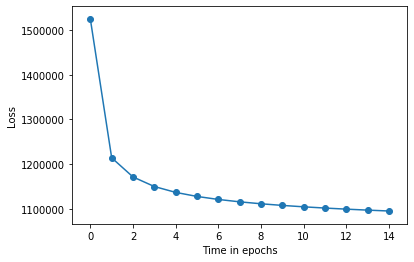

In [64]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

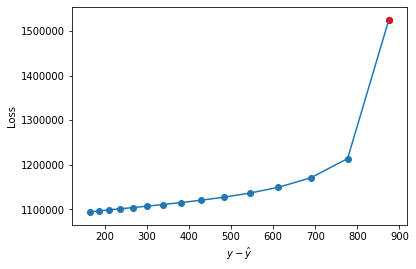

In [65]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show() 
